<a href="https://colab.research.google.com/github/KenDaupsey/Principal-Component-Analysis-with-Diabetes-Dataset/blob/main/Principal_Component_Analysis_with_Diabetes_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *** Principal Component Analysis with Diabetes Dataset ***

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
### Load Dataset and Examine First 5 Rows
url= "https://raw.githubusercontent.com/KenDaupsey/Principal-Component-Analysis-with-Diabetes-Dataset/main/Diabetes%7EBest%7Edataset.csv"
df2 = pd.read_csv(url)
df2.head()

,serial_no,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df2.columns

Index(['serial_no', 'pregnancies', 'glucose', 'bloodpressure', 'skinthickness',
       'insulin', 'bmi', 'diabetespedigreefunction', 'age', 'outcome'],
      dtype='object')

In [4]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   serial_no                 768 non-null    int64  
 1   pregnancies               768 non-null    int64  
 2   glucose                   768 non-null    int64  
 3   bloodpressure             768 non-null    int64  
 4   skinthickness             768 non-null    int64  
 5   insulin                   768 non-null    int64  
 6   bmi                       768 non-null    float64
 7   diabetespedigreefunction  768 non-null    float64
 8   age                       768 non-null    int64  
 9   outcome                   768 non-null    int64  
dtypes: float64(2), int64(8)
memory usage: 60.1 KB


In [5]:
# Select the variables for PCA
X_pca = df2[['pregnancies', 'glucose', 'bloodpressure', 'skinthickness',
       'insulin', 'bmi', 'diabetespedigreefunction', 'age']]

print(X_pca.head() )

   pregnancies  glucose  bloodpressure  skinthickness  insulin   bmi  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   diabetespedigreefunction  age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33  


In [6]:
# Standardize the data
scaler = StandardScaler()
X_pca_scaled = scaler.fit_transform(X_pca)

# Perform PCA
pca = PCA()
pca.fit(X_pca_scaled)

PCA()

In [7]:
# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print(explained_variance_ratio)

[0.26179749 0.21640127 0.12870373 0.10944113 0.09529305 0.08532855
 0.05247702 0.05055776]


In [8]:
# Cumulative explained variance
cumulative_explained_variance = explained_variance_ratio.cumsum()
print(cumulative_explained_variance)

[0.26179749 0.47819876 0.60690249 0.71634362 0.81163667 0.89696522
 0.94944224 1.        ]


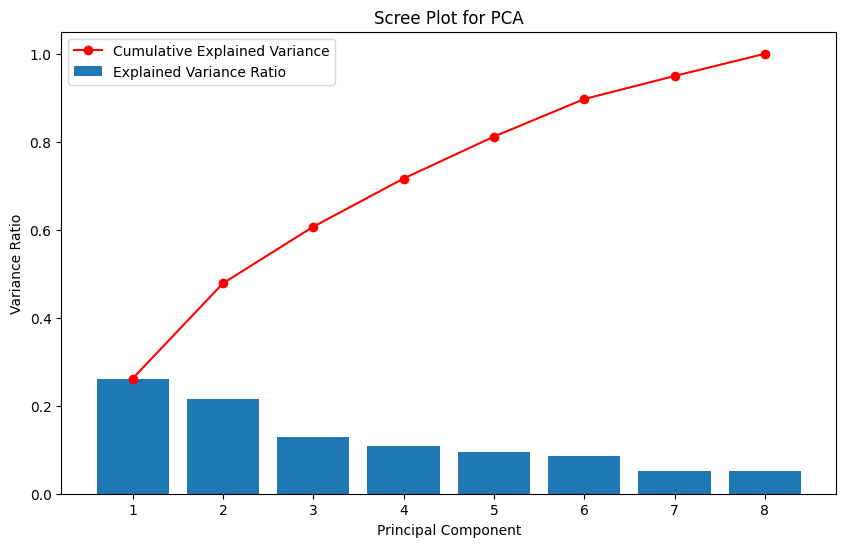

In [9]:
# Scree plot
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, label='Explained Variance Ratio')
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='-', color='r', label='Cumulative Explained Variance')
plt.xlabel('Principal Component')
plt.ylabel('Variance Ratio')
plt.title('Scree Plot for PCA')
plt.legend()
plt.show()

In [10]:
# Choose the number of components based on the scree plot or explained variance threshold
num_components = 3 ### Adjust as needed

# Apply PCA with the chosen number of components
pca = PCA(n_components=num_components)
X_pca_result = pca.fit_transform(X_pca_scaled)

# Create a DataFrame to store the results
pca_columns = [f'PC{i}' for i in range(1, num_components + 1)]
df2_pca_result = pd.DataFrame(data=X_pca_result, columns=pca_columns)

In [11]:
# Concatenate the PCA results with the original dataset
df2_final = pd.concat([df2, df2_pca_result], axis=1)
df2_final. head()

,serial_no,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome,PC1,PC2,PC3
0,1,6,148,72,35,0,33.6,0.627,50,1,1.068503,1.234895,0.095930
1,2,1,85,66,29,0,26.6,0.351,31,0,-1.121683,-0.733852,-0.712938
2,3,8,183,64,0,0,23.3,0.672,32,1,-0.396477,1.595876,1.760678
3,4,1,89,66,23,94,28.1,0.167,21,0,-1.115781,-1.271241,-0.663729
4,5,0,137,40,35,168,43.1,2.288,33,1,2.359334,-2.184819,2.963107


In [12]:
df2_final.columns

Index(['serial_no', 'pregnancies', 'glucose', 'bloodpressure', 'skinthickness',
       'insulin', 'bmi', 'diabetespedigreefunction', 'age', 'outcome', 'PC1',
       'PC2', 'PC3'],
      dtype='object')

In [13]:
# Print the PCA components and their loadings
print("PCA Components:")
print(pca.components_)

PCA Components:
[[ 0.1284321   0.39308257  0.36000261  0.43982428  0.43502617  0.45194134
   0.27061144  0.19802707]
 [ 0.59378583  0.17402908  0.18389207 -0.33196534 -0.25078106 -0.1009598
  -0.122069    0.62058853]
 [-0.01308692  0.46792282 -0.53549442 -0.2376738   0.33670893 -0.36186463
   0.43318905  0.07524755]]


In [14]:
# Print the explained variance ratio for each component
print("Explained Variance Ratio for each Principal Component:")
print(explained_variance_ratio)

Explained Variance Ratio for each Principal Component:
[0.26179749 0.21640127 0.12870373 0.10944113 0.09529305 0.08532855
 0.05247702 0.05055776]


In [15]:
# Print the cumulative explained variance
print("Cumulative Explained Variance:")
print(cumulative_explained_variance)

Cumulative Explained Variance:
[0.26179749 0.47819876 0.60690249 0.71634362 0.81163667 0.89696522
 0.94944224 1.        ]


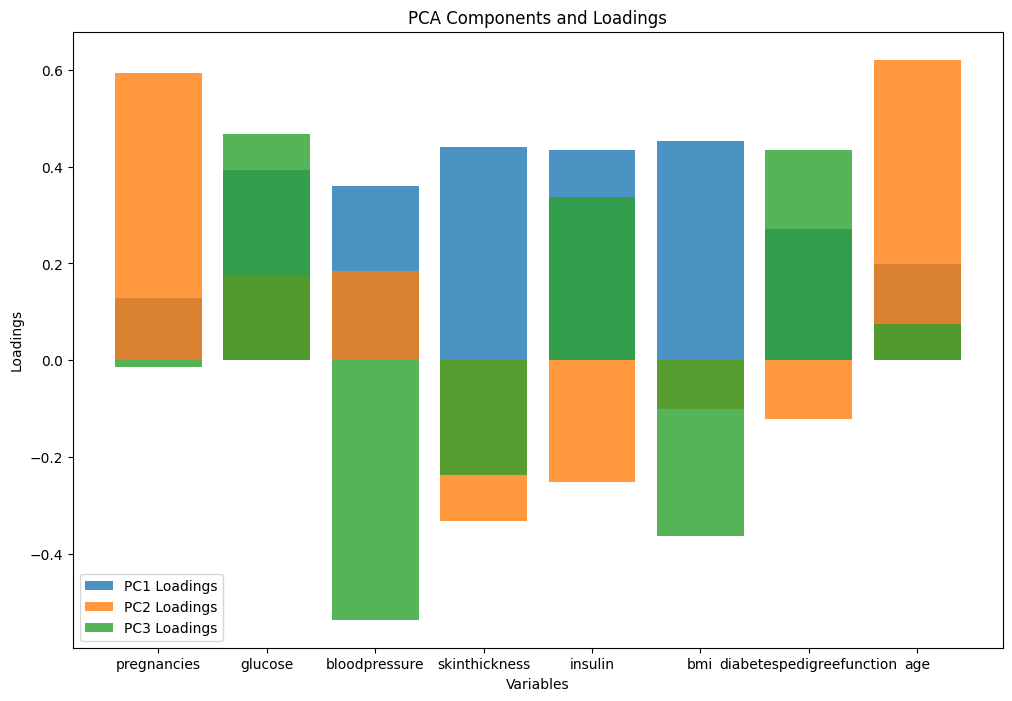

In [16]:
# Bar plot for PCA components and their loadings
plt.figure(figsize=(12, 8))

for i in range(len(pca.components_)):
    plt.bar(X_pca.columns, pca.components_[i], alpha=0.8, label=f'PC{i + 1} Loadings')

plt.xlabel('Variables')
plt.ylabel('Loadings')
plt.title('PCA Components and Loadings')
plt.legend()
plt.show()

*** Entire Code for PCA with Diabetes Dataset ***

   pregnancies  glucose  bloodpressure  skinthickness  insulin   bmi  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   diabetespedigreefunction  age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33  
[0.26179749 0.21640127 0.12870373 0.10944113 0.09529305 0.08532855
 0.05247702 0.05055776]
[0.26179749 0.47819876 0.60690249 0.71634362 0.81163667 0.89696522
 0.94944224 1.        ]


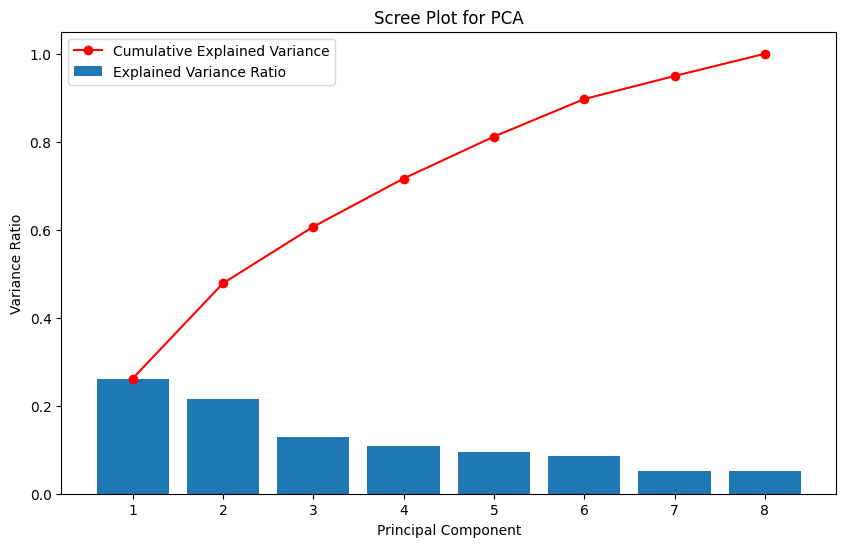

PCA Components:
[[ 0.1284321   0.39308257  0.36000261  0.43982428  0.43502617  0.45194134
   0.27061144  0.19802707]
 [ 0.59378583  0.17402908  0.18389207 -0.33196534 -0.25078106 -0.1009598
  -0.122069    0.62058853]
 [-0.01308692  0.46792282 -0.53549442 -0.2376738   0.33670893 -0.36186463
   0.43318905  0.07524755]]
Explained Variance Ratio for each Principal Component:
[0.26179749 0.21640127 0.12870373 0.10944113 0.09529305 0.08532855
 0.05247702 0.05055776]
Cumulative Explained Variance:
[0.26179749 0.47819876 0.60690249 0.71634362 0.81163667 0.89696522
 0.94944224 1.        ]


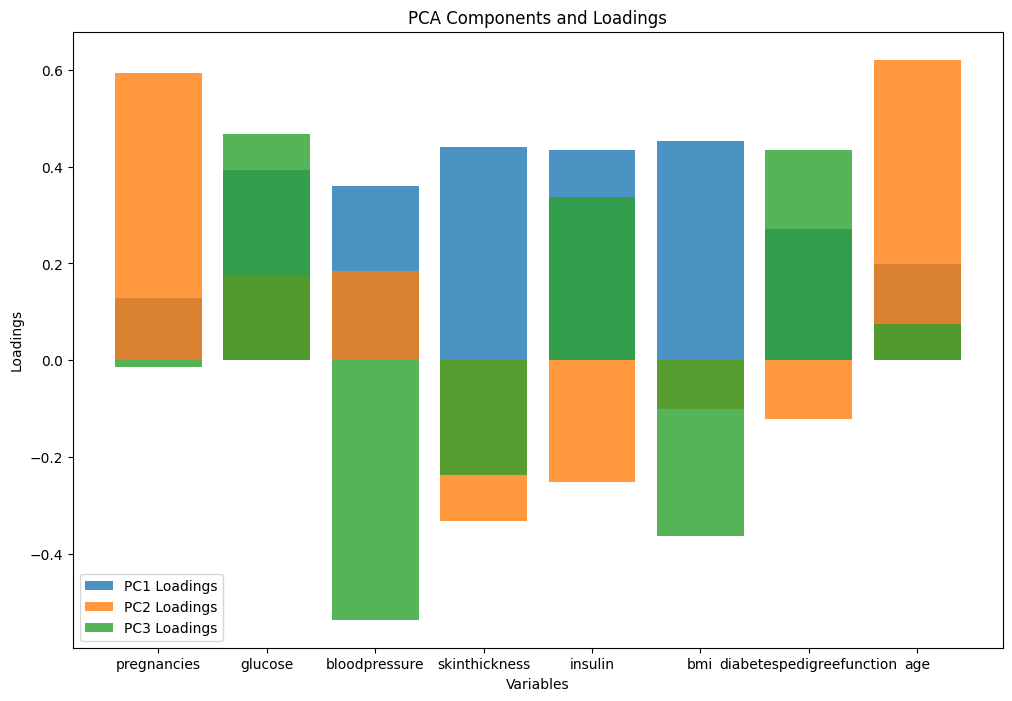

In [17]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

### Load Dataset and Examine First 5 Rows
url= "https://raw.githubusercontent.com/KenDaupsey/Principal-Component-Analysis-with-Diabetes-Dataset/main/Diabetes%7EBest%7Edataset.csv"
df2 = pd.read_csv(url)

df2.head()

# and then the variables within the dataset:

df2.columns

# Select the variables for PCA
X_pca = df2[['pregnancies', 'glucose', 'bloodpressure', 'skinthickness',
             'insulin', 'bmi', 'diabetespedigreefunction', 'age']]

print(X_pca.head())
# Standardize the data
scaler = StandardScaler()
X_pca_scaled = scaler.fit_transform(X_pca)

# Perform PCA
pca = PCA()
pca.fit(X_pca_scaled)
# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print(explained_variance_ratio)
# Cumulative explained variance
cumulative_explained_variance = explained_variance_ratio.cumsum()
print(cumulative_explained_variance)
# Scree plot
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, label='Explained Variance Ratio')
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='-',
         color='r', label='Cumulative Explained Variance')
plt.xlabel('Principal Component')
plt.ylabel('Variance Ratio')
plt.title('Scree Plot for PCA')
plt.legend()
plt.show()
# Choose the number of components based on the scree plot or explained variance threshold
num_components = 3  ### Adjust as needed

# Apply PCA with the chosen number of components
pca = PCA(n_components=num_components)
X_pca_result = pca.fit_transform(X_pca_scaled)

# Create a DataFrame to store the results
pca_columns = [f'PC{i}' for i in range(1, num_components + 1)]
df2_pca_result = pd.DataFrame(data=X_pca_result, columns=pca_columns)
# Concatenate the PCA results with the original dataset
df2_final = pd.concat([df2, df2_pca_result], axis=1)
df2_final.head()
# Print the PCA components and their loadings
print("PCA Components:")
print(pca.components_)
# Print the explained variance ratio for each component
print("Explained Variance Ratio for each Principal Component:")
print(explained_variance_ratio)
# Print the cumulative explained variance
print("Cumulative Explained Variance:")
print(cumulative_explained_variance)
# Bar plot for PCA components and their loadings
plt.figure(figsize=(12, 8))
for i in range(len(pca.components_)):
    plt.bar(X_pca.columns, pca.components_[i], alpha=0.8, label=f'PC{i + 1} Loadings')

plt.xlabel('Variables')
plt.ylabel('Loadings')
plt.title('PCA Components and Loadings')
plt.legend()
plt.show()

*** The End ***